<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Explore-The-Dataset" data-toc-modified-id="Challenge-1---Explore-The-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Explore The Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-data-from-an-bird's-eye-view." data-toc-modified-id="Explore-the-data-from-an-bird's-eye-view.-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the data from an bird's-eye view.</a></span></li><li><span><a href="#Next,-evaluate-if-the-columns-in-this-dataset-are-strongly-correlated." data-toc-modified-id="Next,-evaluate-if-the-columns-in-this-dataset-are-strongly-correlated.-2.0.0.2"><span class="toc-item-num">2.0.0.2&nbsp;&nbsp;</span>Next, evaluate if the columns in this dataset are strongly correlated.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Remove-Column-Collinearity." data-toc-modified-id="Challenge-2---Remove-Column-Collinearity.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Remove Column Collinearity.</a></span></li><li><span><a href="#Challenge-3---Handle-Missing-Values" data-toc-modified-id="Challenge-3---Handle-Missing-Values-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Handle Missing Values</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#In-the-cells-below,-handle-the-missing-values-from-the-dataset.-Remember-to-comment-the-rationale-of-your-decisions." data-toc-modified-id="In-the-cells-below,-handle-the-missing-values-from-the-dataset.-Remember-to-comment-the-rationale-of-your-decisions.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.</a></span></li><li><span><a href="#Again,-examine-the-number-of-missing-values-in-each-column." data-toc-modified-id="Again,-examine-the-number-of-missing-values-in-each-column.-4.0.0.2"><span class="toc-item-num">4.0.0.2&nbsp;&nbsp;</span>Again, examine the number of missing values in each column.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Handle-WHOIS_*-Categorical-Data" data-toc-modified-id="Challenge-4---Handle-WHOIS_*-Categorical-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Handle <code>WHOIS_*</code> Categorical Data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#In-the-cells-below,-fix-the-country-values-as-intructed-above." data-toc-modified-id="In-the-cells-below,-fix-the-country-values-as-intructed-above.-5.0.0.1"><span class="toc-item-num">5.0.0.1&nbsp;&nbsp;</span>In the cells below, fix the country values as intructed above.</a></span></li><li><span><a href="#If-a-limited-number-of-values-account-for-the-majority-of-data,-we-can-retain-these-top-values-and-re-label-all-other-rare-values." data-toc-modified-id="If-a-limited-number-of-values-account-for-the-majority-of-data,-we-can-retain-these-top-values-and-re-label-all-other-rare-values.-5.0.0.2"><span class="toc-item-num">5.0.0.2&nbsp;&nbsp;</span>If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.</a></span></li><li><span><a href="#After-verifying,-now-let's-keep-the-top-10-values-of-the-column-and-re-label-other-columns-with-OTHER." data-toc-modified-id="After-verifying,-now-let's-keep-the-top-10-values-of-the-column-and-re-label-other-columns-with-OTHER.-5.0.0.3"><span class="toc-item-num">5.0.0.3&nbsp;&nbsp;</span>After verifying, now let's keep the top 10 values of the column and re-label other columns with <code>OTHER</code>.</a></span></li><li><span><a href="#In-the-next-cell,-drop-['WHOIS_STATEPRO',-'WHOIS_REGDATE',-'WHOIS_UPDATED_DATE']." data-toc-modified-id="In-the-next-cell,-drop-['WHOIS_STATEPRO',-'WHOIS_REGDATE',-'WHOIS_UPDATED_DATE'].-5.0.0.4"><span class="toc-item-num">5.0.0.4&nbsp;&nbsp;</span>In the next cell, drop <code>['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']</code>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-5---Handle-Remaining-Categorical-Data-&amp;-Convert-to-Ordinal" data-toc-modified-id="Challenge-5---Handle-Remaining-Categorical-Data-&amp;-Convert-to-Ordinal-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Handle Remaining Categorical Data &amp; Convert to Ordinal</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#URL-is-easy.-We'll-simply-drop-it-because-it-has-too-many-unique-values-that-there's-no-way-for-us-to-consolidate." data-toc-modified-id="URL-is-easy.-We'll-simply-drop-it-because-it-has-too-many-unique-values-that-there's-no-way-for-us-to-consolidate.-6.0.0.1"><span class="toc-item-num">6.0.0.1&nbsp;&nbsp;</span><code>URL</code> is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.</a></span></li><li><span><a href="#Print-the-unique-value-counts-of-CHARSET.-You-see-there-are-only-a-few-unique-values.-So-we-can-keep-it-as-it-is." data-toc-modified-id="Print-the-unique-value-counts-of-CHARSET.-You-see-there-are-only-a-few-unique-values.-So-we-can-keep-it-as-it-is.-6.0.0.2"><span class="toc-item-num">6.0.0.2&nbsp;&nbsp;</span>Print the unique value counts of <code>CHARSET</code>. You see there are only a few unique values. So we can keep it as it is.</a></span></li><li><span><a href="#Before-you-think-of-your-own-solution,-don't-read-the-instructions-that-come-next." data-toc-modified-id="Before-you-think-of-your-own-solution,-don't-read-the-instructions-that-come-next.-6.0.0.3"><span class="toc-item-num">6.0.0.3&nbsp;&nbsp;</span>Before you think of your own solution, don't read the instructions that come next.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-6---Modeling,-Prediction,-and-Evaluation" data-toc-modified-id="Challenge-6---Modeling,-Prediction,-and-Evaluation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Modeling, Prediction, and Evaluation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#In-this-lab,-we-will-try-two-different-models-and-compare-our-results." data-toc-modified-id="In-this-lab,-we-will-try-two-different-models-and-compare-our-results.-7.0.0.1"><span class="toc-item-num">7.0.0.1&nbsp;&nbsp;</span>In this lab, we will try two different models and compare our results.</a></span></li><li><span><a href="#Our-second-algorithm-is-is-DecisionTreeClassifier" data-toc-modified-id="Our-second-algorithm-is-is-DecisionTreeClassifier-7.0.0.2"><span class="toc-item-num">7.0.0.2&nbsp;&nbsp;</span>Our second algorithm is is DecisionTreeClassifier</a></span></li><li><span><a href="#We'll-create-another-DecisionTreeClassifier-model-with-max_depth=5." data-toc-modified-id="We'll-create-another-DecisionTreeClassifier-model-with-max_depth=5.-7.0.0.3"><span class="toc-item-num">7.0.0.3&nbsp;&nbsp;</span>We'll create another DecisionTreeClassifier model with max_depth=5.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Bonus-Challenge---Feature-Scaling" data-toc-modified-id="Bonus-Challenge---Feature-Scaling-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge - Feature Scaling</a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

Your features will be:

+ URL: it is the anonymous identification of the URL analyzed in the study
+ URL_LENGTH: it is the number of characters in the URL
+ NUMBER_SPECIAL_CHARACTERS: it is number of special characters identified in the URL, such as, “/”, “%”, “#”, “&”, “. “, “=”
+ CHARSET: it is a categorical value and its meaning is the character encoding standard (also called character set).
+ SERVER: it is a categorical value and its meaning is the operative system of the server got from the packet response.
+ CONTENT_LENGTH: it represents the content size of the HTTP header.
+ WHOIS_COUNTRY: it is a categorical variable, its values are the countries we got from the server response (specifically, our script used the API of Whois).
+ WHOIS_STATEPRO: it is a categorical variable, its values are the states we got from the server response (specifically, our script used the API of Whois).
+ WHOIS_REGDATE: Whois provides the server registration date, so, this variable has date values with format DD/MM/YYY HH:MM
+ WHOIS_UPDATED_DATE: Through the Whois we got the last update date from the server analyzed
+ TCP_CONVERSATION_EXCHANGE: This variable is the number of TCP packets exchanged between the server and our honeypot client
+ DIST_REMOTE_TCP_PORT: it is the number of the ports detected and different to TCP
+ REMOTE_IPS: this variable has the total number of IPs connected to the honeypot
+ APP_BYTES: this is the number of bytes transfered
+ SOURCE_APP_PACKETS: packets sent from the honeypot to the server
+ REMOTE_APP_PACKETS: packets received from the server
+ APP_PACKETS: this is the total number of IP packets generated during the communication between the honeypot and the server
+ DNS_QUERY_TIMES: this is the number of DNS packets generated during the communication between the honeypot and the server
+ TYPE: this is a categorical variable, its values represent the type of web page analyzed, specifically, 1 is for malicious websites and 0 is for benign websites

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:


*Source: [kaggle](https://www.kaggle.com/viratkothari/malicious-and-benign-websites-classification)*

In [2]:
websites = pd.read_csv('../website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [3]:
# What the dataset looks like?

# Import the tabulate module
from tabulate import tabulate

describe_output = websites.describe()
print(tabulate(describe_output, headers="keys", tablefmt="grid"))

print("Dataset Info:")
print(websites.info())
print(websites.isnull().sum())


+-------+--------------+-----------------------------+------------------+-----------------------------+------------------------+--------------+-----------------+----------------------+----------------------+--------------------+--------------------+---------------+-------------------+-------------+
|       |   URL_LENGTH |   NUMBER_SPECIAL_CHARACTERS |   CONTENT_LENGTH |   TCP_CONVERSATION_EXCHANGE |   DIST_REMOTE_TCP_PORT |   REMOTE_IPS |       APP_BYTES |   SOURCE_APP_PACKETS |   REMOTE_APP_PACKETS |   SOURCE_APP_BYTES |   REMOTE_APP_BYTES |   APP_PACKETS |   DNS_QUERY_TIMES |        Type |
+=======+==============+=============================+==================+=============================+========================+==============+=================+======================+======================+====================+====================+===============+===================+=============+
| count |    1781      |                   1781      |            969   |                   1781    

In [4]:
print(websites.isnull().sum())

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64


In [5]:
# What are the data types?
from icecream import ic

categorical_var = ("URL", "CHARSET", "SERVER", "WHOIS_COUNTRY", "WHOIS_STATEPRO")

target_var = "Type"

numerical_var = ("URL_LENGTH", "NUMBER_SPECIAL_CHARACTERS", "CONTENT_LENGTH", "TCP_CONVERSATION_EXCHANGE",
 "DIST_REMOTE_TCP_PORT", "REMOTE_IPS", "APP_BYTES", "SOURCE_APP_PACKETS",
 "REMOTE_APP_PACKETS", "APP_PACKETS", "DNS_QUERY_TIMES")

date_time_var = ("WHOIS_REGDATE", "WHOIS_UPDATED_DATE")


# ic(websites.dtypes)
print(websites.dtypes)

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object


In [6]:
# Which columns contain the features of the websites?

# URL
# URL_LENGTH
# NUMBER_SPECIAL_CHARACTERS
# CHARSET
# SERVER
# CONTENT_LENGTH
# WHOIS_COUNTRY
# WHOIS_STATEPRO
# WHOIS_REGDATE
# WHOIS_UPDATED_DATE
# TCP_CONVERSATION_EXCHANGE
# DIST_REMOTE_TCP_PORT
# REMOTE_IPS
# APP_BYTES
# SOURCE_APP_PACKETS
# REMOTE_APP_PACKETS
# APP_PACKETS
# DNS_QUERY_TIMES



website_features = (
    "URL", "URL_LENGTH", "NUMBER_SPECIAL_CHARACTERS", "CHARSET", "SERVER",
    "CONTENT_LENGTH", "WHOIS_COUNTRY", "WHOIS_STATEPRO", "WHOIS_REGDATE",
    "WHOIS_UPDATED_DATE", "TCP_CONVERSATION_EXCHANGE", "DIST_REMOTE_TCP_PORT",
    "REMOTE_IPS", "APP_BYTES", "SOURCE_APP_PACKETS", "REMOTE_APP_PACKETS",
    "APP_PACKETS", "DNS_QUERY_TIMES"
)


In [7]:
# Calculate the percentage of missing data
missing_percentage = websites.isna().sum() / len(websites) * 100
print(missing_percentage.round(2))


URL                           0.00
URL_LENGTH                    0.00
NUMBER_SPECIAL_CHARACTERS     0.00
CHARSET                       0.39
SERVER                        9.88
CONTENT_LENGTH               45.59
WHOIS_COUNTRY                17.18
WHOIS_STATEPRO               20.33
WHOIS_REGDATE                 7.13
WHOIS_UPDATED_DATE            7.80
TCP_CONVERSATION_EXCHANGE     0.00
DIST_REMOTE_TCP_PORT          0.00
REMOTE_IPS                    0.00
APP_BYTES                     0.00
SOURCE_APP_PACKETS            0.00
REMOTE_APP_PACKETS            0.00
SOURCE_APP_BYTES              0.00
REMOTE_APP_BYTES              0.00
APP_PACKETS                   0.00
DNS_QUERY_TIMES               0.06
Type                          0.00
dtype: float64


In [8]:
# Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?

# 'Type' column is the target variable that indicates whether a website is benign or malicious

print(websites["Type"])


0       1
1       0
2       0
3       0
4       0
       ..
1776    1
1777    1
1778    0
1779    0
1780    0
Name: Type, Length: 1781, dtype: int64


In [9]:
# 0 for bening 1 for maliciuos websites

In [10]:
# Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

# the need to transform depends on the model. If we are using linear models then:

# CHARSET, SERVER, WHOIS_COUNTRY, WHOIS_STATEPRO 

# would need transformation.

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

Non-numeric columns: Index(['WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], dtype='object')


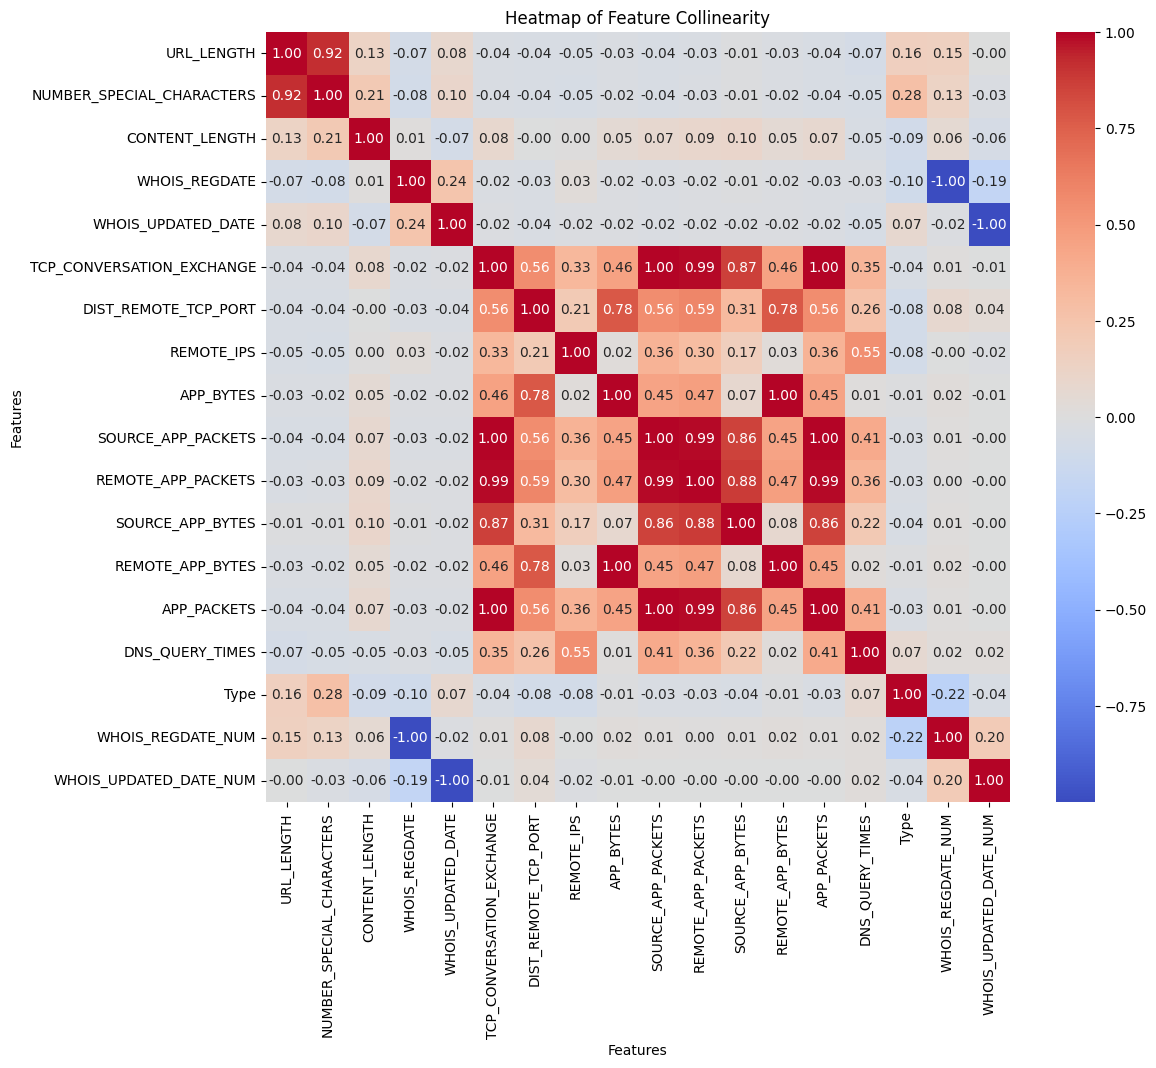

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Make a copy of the DataFrame
websites_copy = websites.copy()

# Remove the categoricals
websites_copy = websites_copy.drop(columns=list(categorical_var))

# Step 1: Identify non-numeric columns
non_numeric_columns = websites_copy.select_dtypes(exclude=["number"]).columns
print("Non-numeric columns:", non_numeric_columns)

# Parse dates into datetime format
websites_copy['WHOIS_REGDATE'] = pd.to_datetime(websites_copy['WHOIS_REGDATE'], errors='coerce')
websites_copy['WHOIS_UPDATED_DATE'] = pd.to_datetime(websites_copy['WHOIS_UPDATED_DATE'], errors='coerce')

# Choose a reference date
reference_date = pd.to_datetime("2025-01-01")

# Convert dates to numeric values (days since the reference date)
websites_copy['WHOIS_REGDATE_NUM'] = (reference_date - websites_copy['WHOIS_REGDATE']).dt.days
websites_copy['WHOIS_UPDATED_DATE_NUM'] = (reference_date - websites_copy['WHOIS_UPDATED_DATE']).dt.days


correlation_matrix = websites_copy.corr()

# Create a heatmap using seaborn to visualize collinearity
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Feature Collinearity")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()



In [12]:
# | **Highly Correlated Features**       | ** Column to Remove** | **Reason**                                    |
# |---------------------------------------|---------------------------------|-----------------------------------------------|
# | `APP_PACKETS` and `REMOTE_APP_PACKETS` | `APP_PACKETS`                  | Perfect correlation (1.00). Keep `REMOTE_APP_PACKETS`. |
# | `APP_BYTES` and `REMOTE_APP_BYTES`    | `REMOTE_APP_BYTES`             | High correlation (~0.78). Keep `APP_BYTES`.  |
# | `SOURCE_APP_PACKETS` and `APP_PACKETS` | `SOURCE_APP_PACKETS`           | High correlation (~0.99). Keep `APP_PACKETS`. |
# | `SOURCE_APP_BYTES` and `REMOTE_APP_BYTES` | `SOURCE_APP_BYTES`             | High correlation (~0.87). Keep `REMOTE_APP_BYTES`. |

### This is an example to know the feacture importance using a ML model

In [13]:
#! pip install xgboost

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# convert datetime columns to numeric
reference_date = pd.to_datetime("2025-01-01")
websites_copy['WHOIS_REGDATE_NUM'] = (reference_date - websites_copy['WHOIS_REGDATE']).dt.days
websites_copy['WHOIS_UPDATED_DATE_NUM'] = (reference_date - websites_copy['WHOIS_UPDATED_DATE']).dt.days

# drop the original datetime columns
websites_copy = websites_copy.drop(columns=['WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'])

# separate features (X) and target (y)
X = websites_copy.drop(columns=['Type'])
y = websites_copy['Type']  

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

# Initialize the XGBoost classifier
model = XGBClassifier(random_state=27)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Display tabulated classification report
print("\nClassification Report:")
print(tabulate(report_df, headers="keys", tablefmt="grid", floatfmt=".2f"))



Accuracy: 0.96

Classification Report:
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
+==============+=============+==========+============+===========+
| 0            |        0.97 |     0.98 |       0.98 |    315.00 |
+--------------+-------------+----------+------------+-----------+
| 1            |        0.86 |     0.76 |       0.81 |     42.00 |
+--------------+-------------+----------+------------+-----------+
| accuracy     |        0.96 |     0.96 |       0.96 |      0.96 |
+--------------+-------------+----------+------------+-----------+
| macro avg    |        0.92 |     0.87 |       0.89 |    357.00 |
+--------------+-------------+----------+------------+-----------+
| weighted avg |        0.96 |     0.96 |       0.96 |    357.00 |
+--------------+-------------+----------+------------+-----------+


In [15]:
# The model performed really well with an accuracy of 96%, meaning it classified most websites correctly. 
# It did better on benign websites (0) than malicious ones (1), with a recall of 99% for benign and 76% for malicious. 
# Overall, it handled the data well despite the imbalance between the two classes.


In [16]:
# import xgboost as xgb

# # This code seems to be wrong or out of date?
# xgb.fit(X,y)

In [17]:
# sort_idx = xgb.feature_importances_.argsort()
# feature names
features = X_train.columns

# get feature importance values
importances = model.feature_importances_  

# Sort feature importances from most to least important
sorted_importances = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)
importance_df = pd.DataFrame(sorted_importances, columns=["Feature", "Importance"])

# Add a rank column (1 to N)
importance_df["Rank"] = range(1, len(importance_df) + 1)

# Display feature importances using tabulate
print("\nFeature Importances (Sorted):")
print(tabulate(importance_df, headers="keys", tablefmt="grid", floatfmt=".4f"))


Feature Importances (Sorted):
+----+---------------------------+--------------+--------+
|    | Feature                   |   Importance |   Rank |
+====+===========================+==============+========+
|  0 | REMOTE_APP_PACKETS        |       0.3188 |      1 |
+----+---------------------------+--------------+--------+
|  1 | DIST_REMOTE_TCP_PORT      |       0.1728 |      2 |
+----+---------------------------+--------------+--------+
|  2 | WHOIS_UPDATED_DATE_NUM    |       0.0948 |      3 |
+----+---------------------------+--------------+--------+
|  3 | NUMBER_SPECIAL_CHARACTERS |       0.0754 |      4 |
+----+---------------------------+--------------+--------+
|  4 | SOURCE_APP_PACKETS        |       0.0482 |      5 |
+----+---------------------------+--------------+--------+
|  5 | URL_LENGTH                |       0.0482 |      6 |
+----+---------------------------+--------------+--------+
|  6 | APP_BYTES                 |       0.0480 |      7 |
+----+-------------------

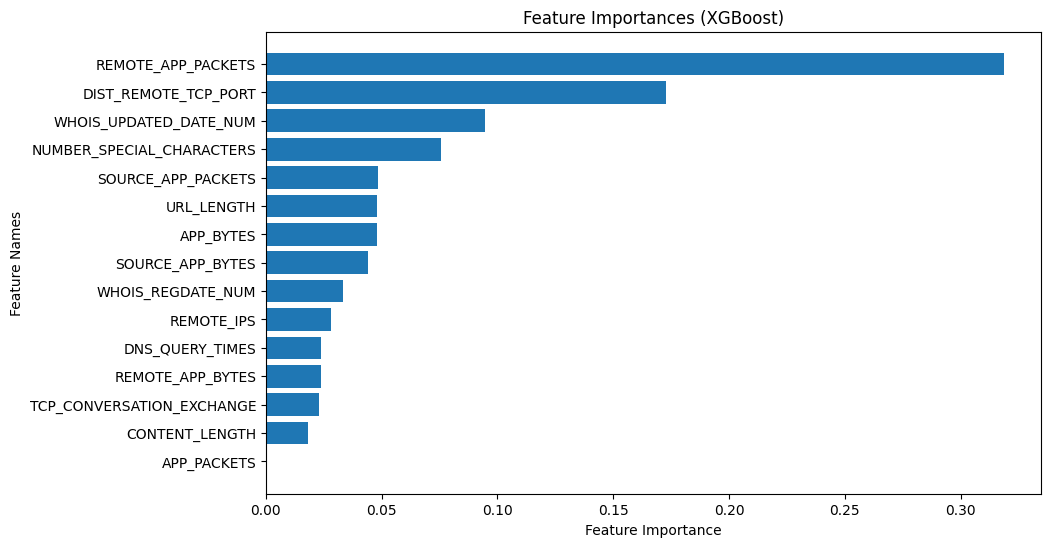

In [18]:
# plt.barh(X.columns[sort_idx],xgb.feature_importances_[sort_idx])
# plt.show();

import matplotlib.pyplot as plt

# Sort features by importance
sort_idx = model.feature_importances_.argsort()

# Create a horizontal bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns[sort_idx], model.feature_importances_[sort_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Feature Importances (XGBoost)")
plt.show()



    In the previous plot we can see the feactures with lower weight in the dataset.

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [19]:
# Columns to remove based on high collinearity
columns_to_remove = ['APP_PACKETS']

# Drop these columns from the DataFrame
websites_copy = websites_copy.drop(columns=columns_to_remove)

# Display the updated columns
print("Remaining columns after removing high collinearity features:")
print(websites_copy.columns)


Remaining columns after removing high collinearity features:
Index(['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CONTENT_LENGTH',
       'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'DNS_QUERY_TIMES', 'Type',
       'WHOIS_REGDATE_NUM', 'WHOIS_UPDATED_DATE_NUM'],
      dtype='object')


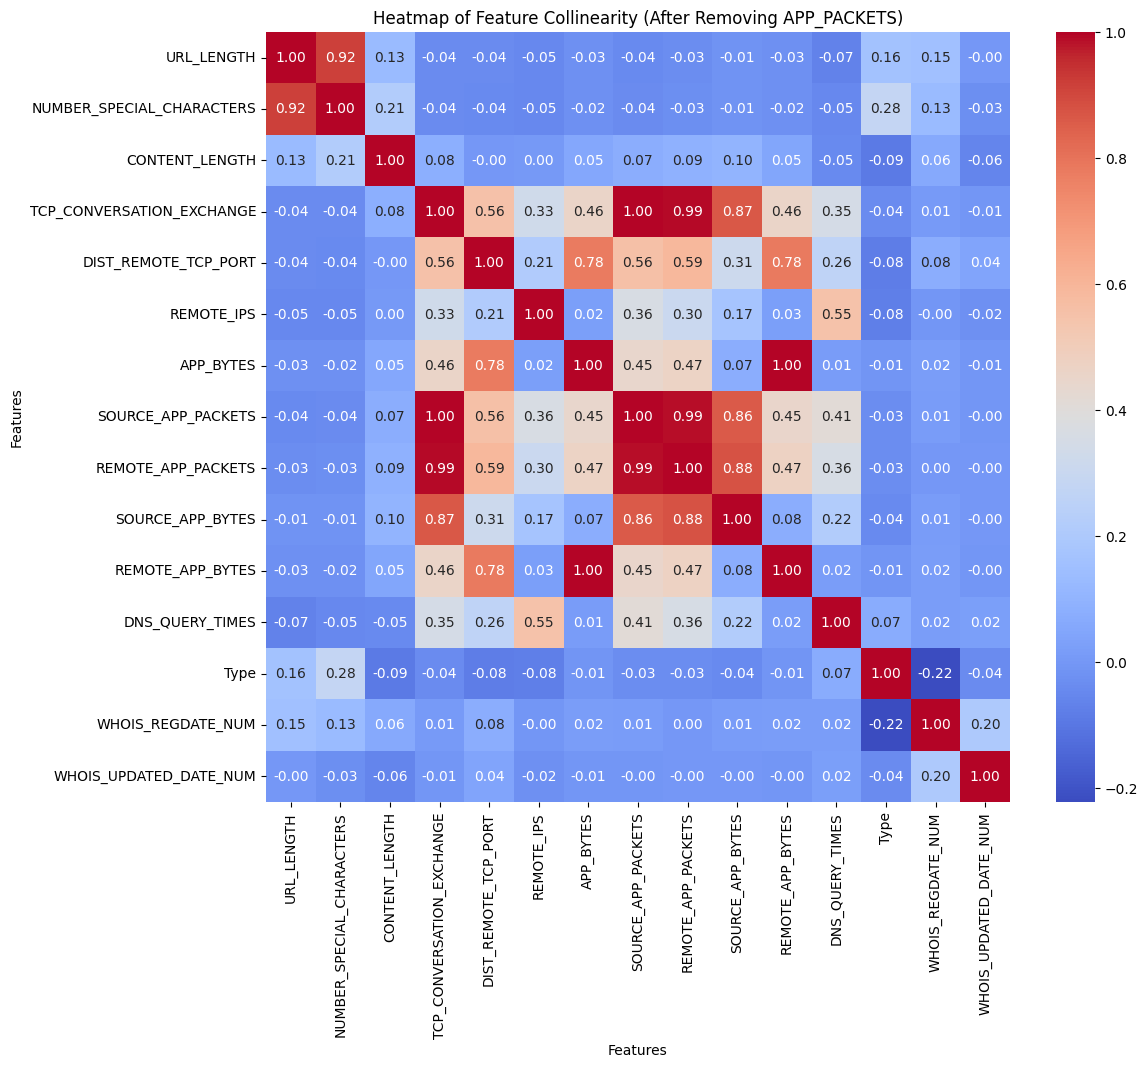

In [20]:
# Recompute the correlation matrix after dropping `APP_PACKETS`
correlation_matrix = websites_copy.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Feature Collinearity (After Removing APP_PACKETS)")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

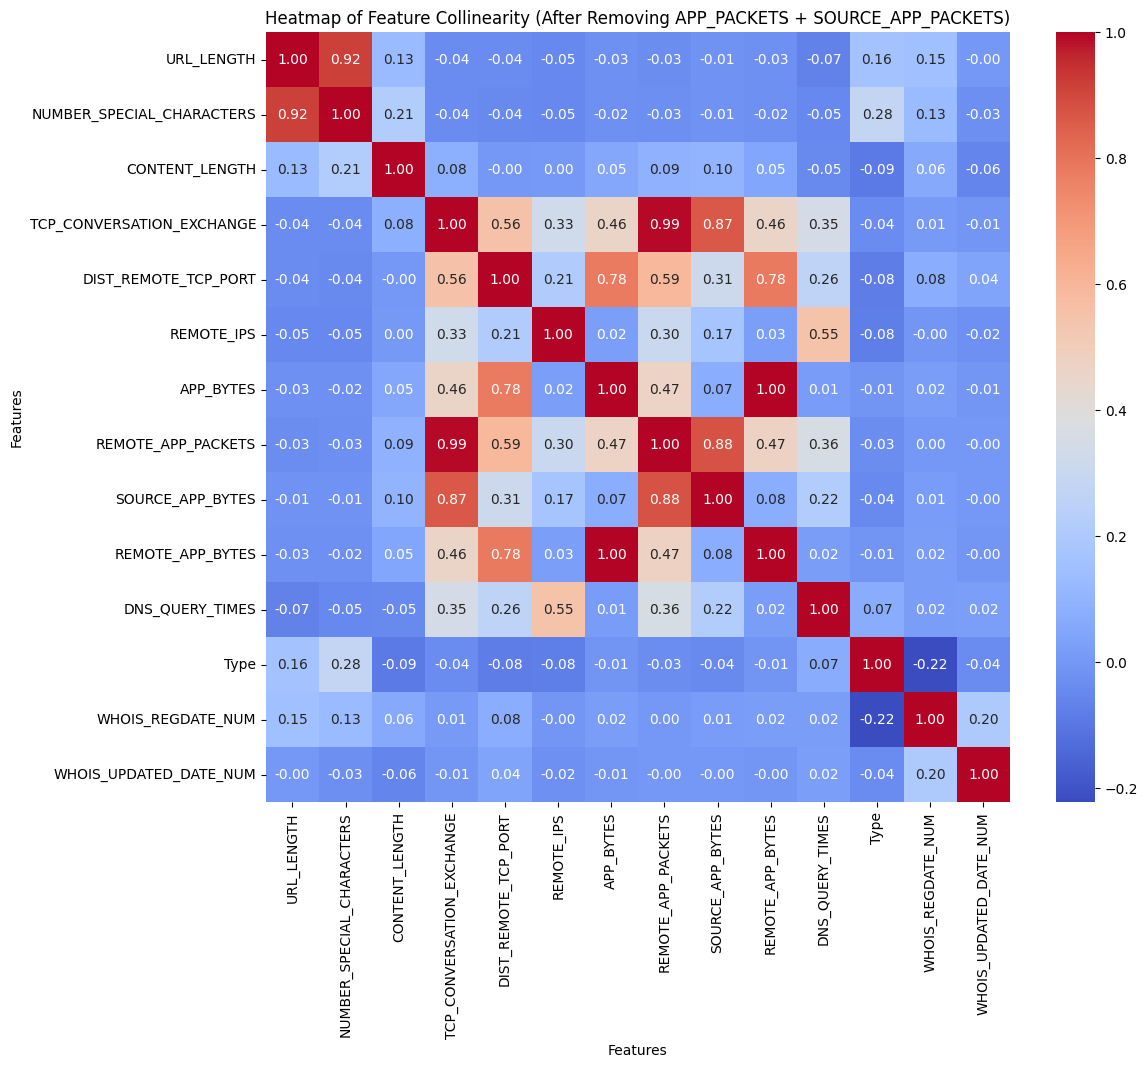

In [21]:
# Remove the next highly correlated column
websites_copy = websites_copy.drop(columns=['SOURCE_APP_PACKETS'])

# Recompute the correlation matrix after dropping `SOURCE_APP_PACKETS`
correlation_matrix = websites_copy.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Feature Collinearity (After Removing APP_PACKETS + SOURCE_APP_PACKETS)")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

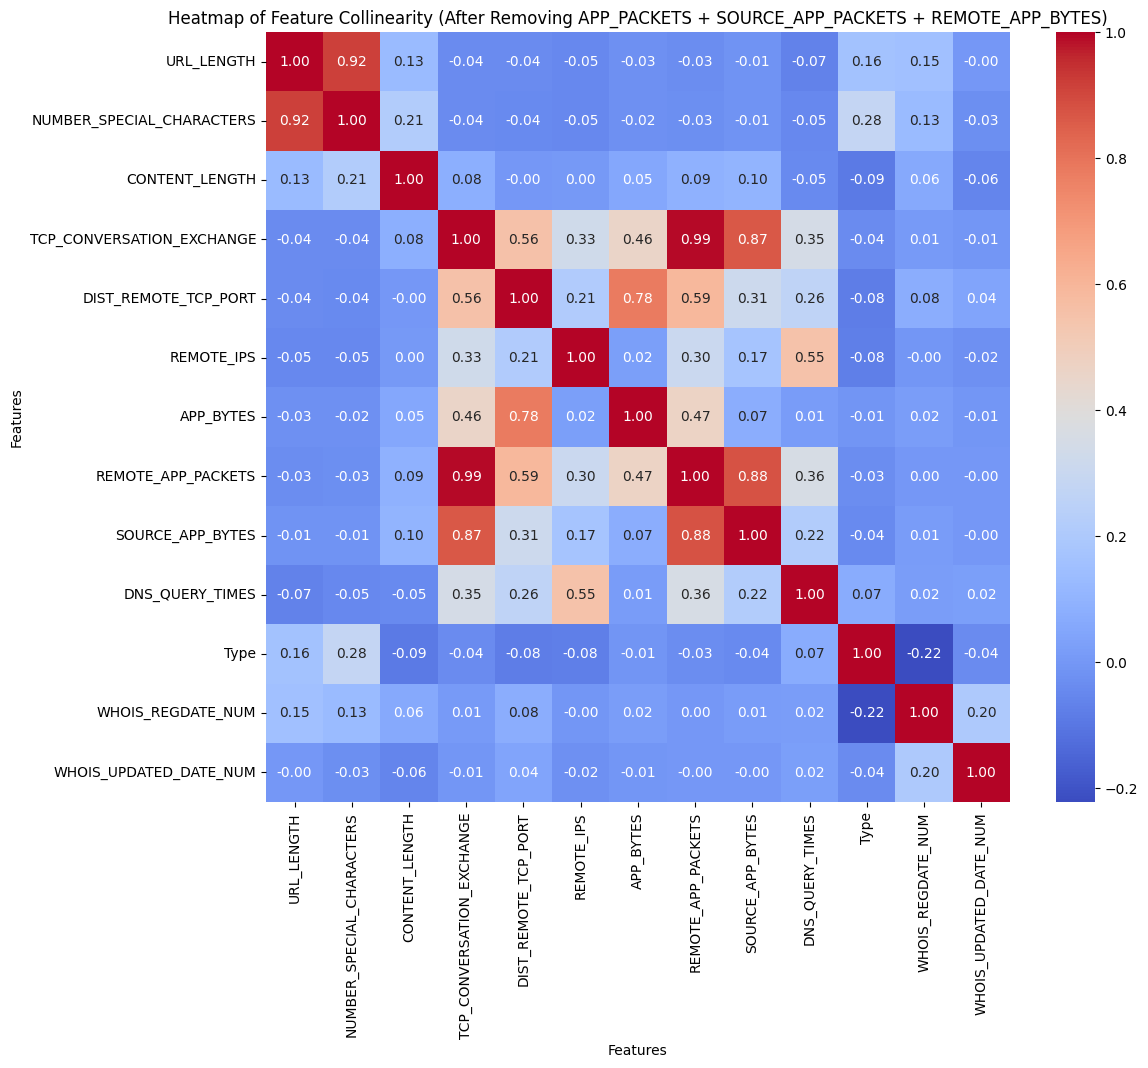

In [22]:
# Remove the next highly correlated column
websites_copy = websites_copy.drop(columns=['REMOTE_APP_BYTES'])

# Recompute the correlation matrix after dropping `REMOTE_APP_BYTES`
correlation_matrix = websites_copy.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Feature Collinearity (After Removing APP_PACKETS + SOURCE_APP_PACKETS + REMOTE_APP_BYTES)")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

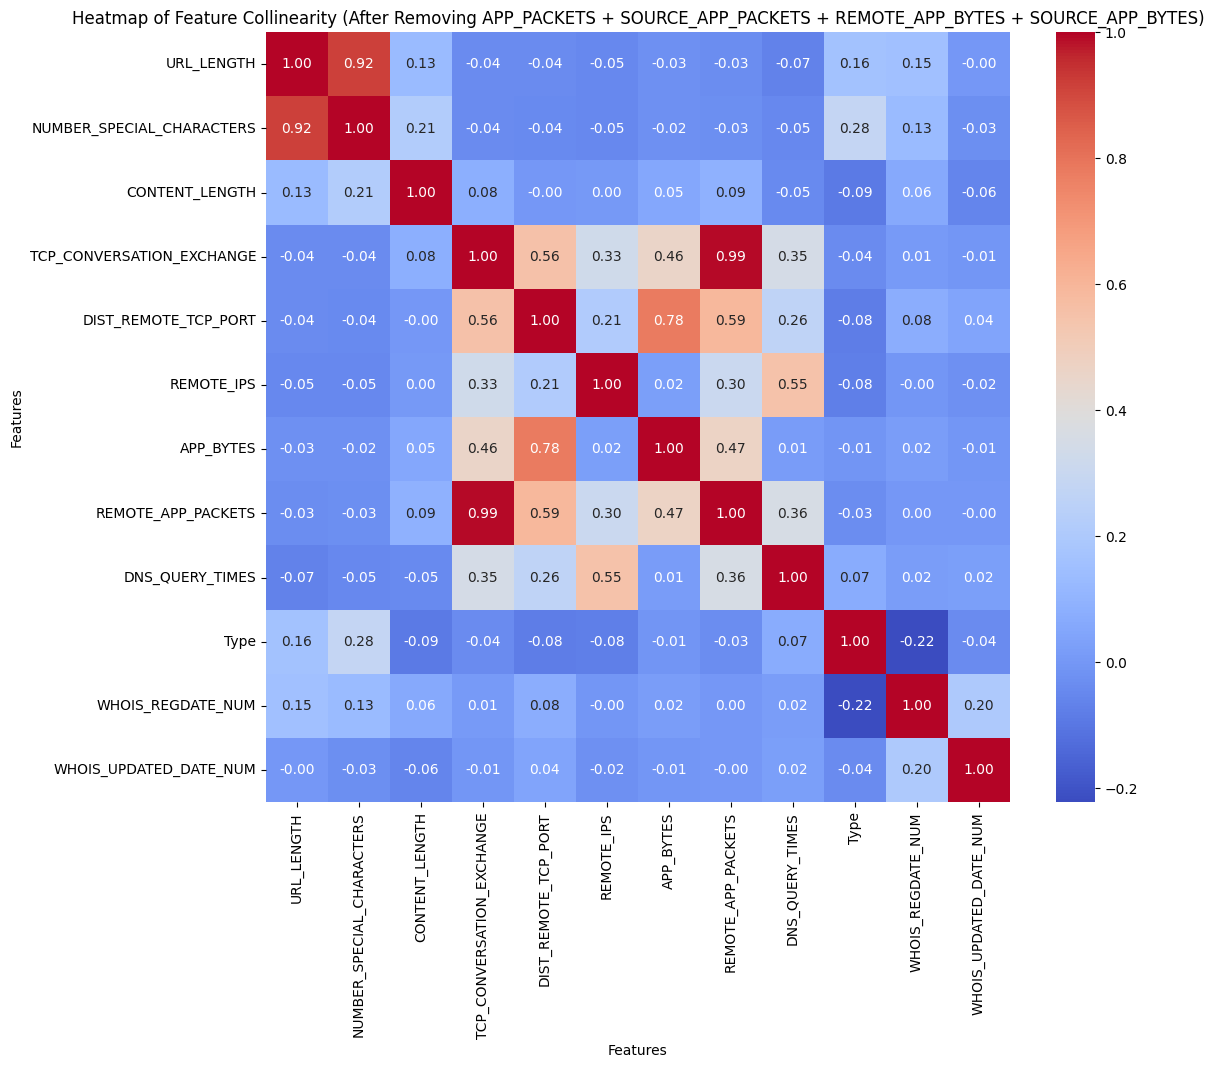

In [23]:
# Remove the next highly correlated column
websites_copy = websites_copy.drop(columns=['SOURCE_APP_BYTES'])

# Recompute the correlation matrix after dropping `SOURCE_APP_BYTES`
correlation_matrix = websites_copy.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Feature Collinearity (After Removing APP_PACKETS + SOURCE_APP_PACKETS + REMOTE_APP_BYTES + SOURCE_APP_BYTES)")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [24]:
# Examine missing values in the websites_copy DataFrame
missing_values = websites_copy.isnull().sum()

# Display columns with missing values and their counts
missing_values = missing_values[missing_values > 0]
print("Columns with missing values:")
print(missing_values)

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(websites_copy)) * 100
print("\nPercentage of missing values per column:")
print(missing_percentage)

Columns with missing values:
CONTENT_LENGTH             812
DNS_QUERY_TIMES              1
WHOIS_REGDATE_NUM         1205
WHOIS_UPDATED_DATE_NUM    1122
dtype: int64

Percentage of missing values per column:
CONTENT_LENGTH            45.592364
DNS_QUERY_TIMES            0.056148
WHOIS_REGDATE_NUM         67.658619
WHOIS_UPDATED_DATE_NUM    62.998316
dtype: float64


In [25]:
# Firts we will drop the columns with more than 50% of missing data
websites_copy = websites_copy.drop(columns=['WHOIS_REGDATE_NUM', 'WHOIS_UPDATED_DATE_NUM'])

In [26]:
# Now we will drop the rows with missing data
websites_copy = websites_copy.dropna()


Number of rows after dropping missing data: 968


#### Again, examine the number of missing values in each column. 

    If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [27]:
# Examine missing values in the websites_copy DataFrame
missing_values = websites_copy.isnull().sum()

# Display columns with missing values and their counts
missing_values = missing_values[missing_values > 0]
print("Columns with missing values:")
print(missing_values)

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(websites_copy)) * 100
print("\nPercentage of missing values per column:")
print(missing_percentage)

Columns with missing values:
Series([], dtype: int64)

Percentage of missing values per column:
Series([], dtype: float64)


# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [37]:
# check outputs
value_counts = websites.WHOIS_COUNTRY.value_counts()
unique_values = websites.WHOIS_COUNTRY.unique()
nunique_values = websites.WHOIS_COUNTRY.nunique()

# Create a structured table
output_data = {
    "Metric": ["Value Counts", "Unique Values", "Number of Unique Values"],
    "Result": [
        value_counts.to_dict(),  # Convert value_counts to a dictionary for clarity
        list(unique_values),     # Convert unique values to a list
        nunique_values           # Number of unique values
    ]
}

# Convert to DataFrame for tabulation
output_df = pd.DataFrame(output_data)

# Display the table using tabulate
print(tabulate(output_df, headers="keys", tablefmt="grid"))

+----+-------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|    | Metric                  | Result                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [43]:

good_country = {'None':'None', 
                'US':'US', 
                'SC':'SC', 
                'GB':'UK', 
                'UK':'UK', 
                'RU':'RU', 
                'AU':'AU', 
                'CA':'CA',
                'PA':'PA',
                'se':'SE', 
                'IN':'IN',
                'LU':'LU', 
                'TH':'TH', 
                "[u'GB'; u'UK']":'UK', 
                'FR':'FR',
                'NL':'NL',
                'UG':'UG', 
                'JP':'JP', 
                'CN':'CN', 
                'SE':'SE',
                'SI':'SI', 
                'IL':'IL', 
                'ru':'RU', 
                'KY':'KY', 
                'AT':'AT', 
                'CZ':'CZ', 
                'PH':'PH', 
                'BE':'BE', 
                'NO':'NO', 
                'TR':'TR', 
                'LV':'LV',
                'DE':'DE', 
                'ES':'ES', 
                'BR':'BR', 
                'us':'US', 
                'KR':'KR', 
                'HK':'HK', 
                'UA':'UA', 
                'CH':'CH', 
                'United Kingdom':'UK',
                'BS':'BS', 
                'PK':'PK', 
                'IT':'IT', 
                'Cyprus':'CY', 
                'BY':'BY', 
                'AE':'AE', 
                'IE':'IE', 
                'UY':'UY', 
                'KG':'KG'}

# Find matches between dictionary keys and column values
dict_keys = set(good_country.keys())
column_values = set(websites["WHOIS_COUNTRY"].unique())
matches = dict_keys.intersection(column_values)

# Count matches
num_matches = len(matches)

unmatched_values = column_values - dict_keys  
num_unmatched = len(unmatched_values)

print(f"Number of matches: {num_matches}")
print(f"Number of unmatched values: {num_unmatched}")
print(f"Unmatched values: {unmatched_values}")

# there is a {nan} unmatched, which I will fill with UNKNOWN
websites.WHOIS_COUNTRY = websites.WHOIS_COUNTRY.fillna("UNKNOWN").apply(lambda x: good_country.get(x, "UNKNOWN"))

# websites.WHOIS_COUNTRY = websites.WHOIS_COUNTRY.apply(lambda x : good_country[x])

Number of matches: 48
Number of unmatched values: 1
Unmatched values: {nan}


In [44]:
websites.WHOIS_COUNTRY.unique()

array(['UNKNOWN', 'US', 'SC', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN',
       'LU', 'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'KY', 'AT',
       'CZ', 'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR', 'HK',
       'UA', 'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [45]:
def print_bar_plot(x,y):
    plt.bar(x, y)
    plt.figure(figsize=(15,15))
    return plt.show()

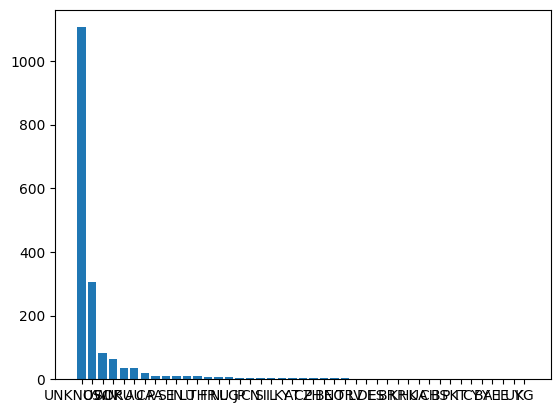

<Figure size 1500x1500 with 0 Axes>

In [46]:
print_bar_plot(websites.WHOIS_COUNTRY.unique(),websites.WHOIS_COUNTRY.value_counts());

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

Top 10 WHOIS_COUNTRY values and their counts:
WHOIS_COUNTRY
US         1106
UNKNOWN     306
CA           84
ES           63
UK           35
AU           35
PA           21
JP           11
CN           10
IN           10
Name: count, dtype: int64


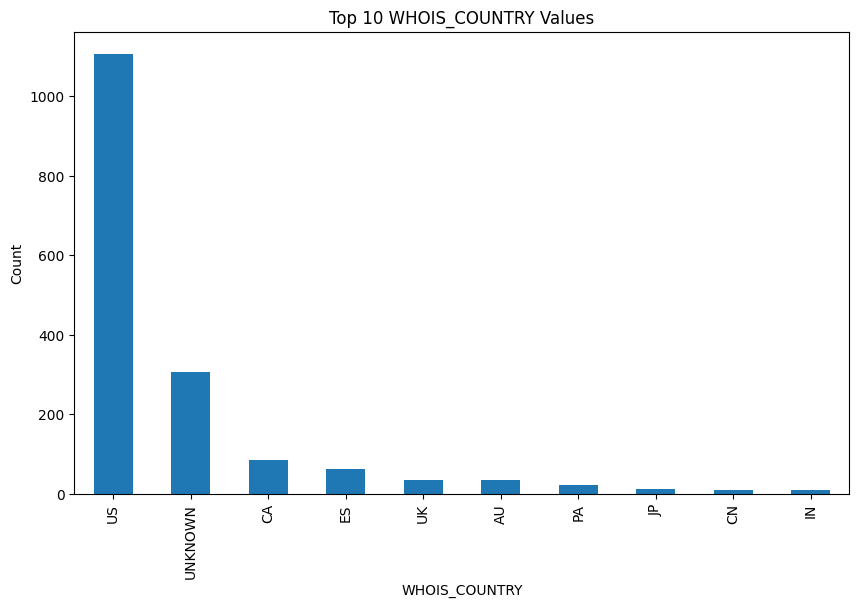

In [47]:
# Output the counts of the top 10 values in the WHOIS_COUNTRY column
top_10_counts = websites["WHOIS_COUNTRY"].value_counts().head(10)

print("Top 10 WHOIS_COUNTRY values and their counts:")
print(top_10_counts)

# Bar plot for visualization
top_10_counts.plot(kind='bar', figsize=(10, 6), title="Top 10 WHOIS_COUNTRY Values")
plt.xlabel("WHOIS_COUNTRY")
plt.ylabel("Count")
plt.show()

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [48]:

columns_to_drop = ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']
websites.drop(columns=columns_to_drop, inplace=True)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [50]:
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [51]:
columns_to_drop = ['URL']
websites.drop(columns=columns_to_drop, inplace=True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [52]:
websites.CHARSET.unique()

array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', nan,
       'windows-1251', 'ISO-8859', 'windows-1252'], dtype=object)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [53]:
websites.SERVER.unique()

array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', nan, 'Apache/2',
       'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
       'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'tsa_c', 'Apache/2.2.0 (Fedora)', 'Apache/2.2.22 (Debian)',
       'Apache/2.2.15 (CentOS)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips',
 

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [55]:
# Count `SERVER` value counts here

# Tuple of servers to match
servers = ('Microsoft', 'Apache', 'nginx')


def server_match(server):
    if isinstance(server, str):  # Only process if  value is a str
        for s in servers:
            if s.lower() in server.lower():  # Case-insensitive match
                return s  # Return  matched server from  tuple
    return "Other"  # If no match or invalid type, return "Other"

# Apply function to  column
websites["SERVER"] = websites["SERVER"].apply(server_match)

# Display unique values in updated column
print("Unique SERVER values:")
print(websites["SERVER"].unique())

# Count of top SERVER values
print("\nSERVER value counts:")
print(websites["SERVER"].value_counts())

Unique SERVER values:
['nginx' 'Apache' 'Microsoft' 'Other']

SERVER value counts:
SERVER
Apache       643
Other        504
nginx        436
Microsoft    198
Name: count, dtype: int64


OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [57]:
website_dummy = pd.get_dummies(websites, drop_first=True)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [58]:
website_dummy.dtypes

# no categoricals

URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CONTENT_LENGTH               float64
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
                              ...   
WHOIS_COUNTRY_UG                bool
WHOIS_COUNTRY_UK                bool
WHOIS_COUNTRY_UNKNOWN           bool
WHOIS_COUNTRY_US                bool
WHOIS_COUNTRY_UY                bool
Length: 66, dtype: object

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [59]:
from sklearn.model_selection import train_test_split

# separate features (X) and target (y)
X = website_dummy.drop(columns=['Type'])
y = website_dummy['Type']  

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

# Initialize the XGBoost classifier
model = XGBClassifier(random_state=27)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Display tabulated classification report
print("\nClassification Report:")
print(tabulate(report_df, headers="keys", tablefmt="grid", floatfmt=".2f"))


Accuracy: 0.96

Classification Report:
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
+==============+=============+==========+============+===========+
| 0            |        0.97 |     0.99 |       0.98 |    315.00 |
+--------------+-------------+----------+------------+-----------+
| 1            |        0.89 |     0.76 |       0.82 |     42.00 |
+--------------+-------------+----------+------------+-----------+
| accuracy     |        0.96 |     0.96 |       0.96 |      0.96 |
+--------------+-------------+----------+------------+-----------+
| macro avg    |        0.93 |     0.87 |       0.90 |    357.00 |
+--------------+-------------+----------+------------+-----------+
| weighted avg |        0.96 |     0.96 |       0.96 |    357.00 |
+--------------+-------------+----------+------------+-----------+


#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [61]:
from sklearn.linear_model import LogisticRegression

# Separate features (X) and target (y)
X = website_dummy.drop(columns=['Type'])
y = website_dummy['Type']  

# dropping rows with missing values
X = X.dropna()
y = y.loc[X.index]  # Align `y` with the updated `X`



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=27, max_iter=1000)

# Train the Logistic Regression model
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Display tabulated classification report
print("\nClassification Report:")
print(tabulate(report_df, headers="keys", tablefmt="grid", floatfmt=".2f"))


Accuracy: 0.94

Classification Report:
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
+==============+=============+==========+============+===========+
| 0            |        0.98 |     0.96 |       0.97 |    180.00 |
+--------------+-------------+----------+------------+-----------+
| 1            |        0.56 |     0.71 |       0.63 |     14.00 |
+--------------+-------------+----------+------------+-----------+
| accuracy     |        0.94 |     0.94 |       0.94 |      0.94 |
+--------------+-------------+----------+------------+-----------+
| macro avg    |        0.77 |     0.83 |       0.80 |    194.00 |
+--------------+-------------+----------+------------+-----------+
| weighted avg |        0.95 |     0.94 |       0.94 |    194.00 |
+--------------+-------------+----------+------------+-----------+


c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [62]:
# Fit the Logistic Regression model to the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Display the classification report using tabulate
print("\nClassification Report:")
print(tabulate(report_df, headers="keys", tablefmt="grid", floatfmt=".2f"))

Accuracy: 0.94

Classification Report:
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
+==============+=============+==========+============+===========+
| 0            |        0.98 |     0.96 |       0.97 |    180.00 |
+--------------+-------------+----------+------------+-----------+
| 1            |        0.56 |     0.71 |       0.63 |     14.00 |
+--------------+-------------+----------+------------+-----------+
| accuracy     |        0.94 |     0.94 |       0.94 |      0.94 |
+--------------+-------------+----------+------------+-----------+
| macro avg    |        0.77 |     0.83 |       0.80 |    194.00 |
+--------------+-------------+----------+------------+-----------+
| weighted avg |        0.95 |     0.94 |       0.94 |    194.00 |
+--------------+-------------+----------+------------+-----------+


c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score


# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Display results
print("Confusion Matrix:")
print(conf_matrix)

print(f"\nAccuracy Score: {accuracy:.2f}")

Confusion Matrix:
[[172   8]
 [  4  10]]

Accuracy Score: 0.94


What are your thoughts on the performance of the model? Write your conclusions below.

In [ ]:
# Accuracy Score: 0.94

# True Negatives (172): The model correctly identifies most benign websites (class 0).
# False Positives (8): A small number of benign websites are misclassified as malicious (class 1).
# False Negatives (4): Some malicious websites (class 1) are missed and classified as benign.
# True Positives (10): The model identifies some malicious websites correctly.

### Your conclusions here:
    The model is working fine but it have many errors in Type 2, it says that the model predict a non malicious web like a malicious web


#### Our second algorithm is is DecisionTreeClassifier

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `DecisionTreeClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where max_depth=3

In [64]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier with max_depth=3
decision_tree_model = DecisionTreeClassifier(max_depth=3, random_state=27)

# Fit the model to the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_tree = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy: {accuracy_tree:.2f}")

# Generate a classification report
report_tree = classification_report(y_test, y_pred_tree, output_dict=True)
report_tree_df = pd.DataFrame(report_tree).transpose()

# Display the classification report using tabulate
print("\nClassification Report:")
print(tabulate(report_tree_df, headers="keys", tablefmt="grid", floatfmt=".2f"))

# Display the confusion matrix
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print("\nConfusion Matrix:")
print(conf_matrix_tree)

Accuracy: 0.96

Classification Report:
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
+==============+=============+==========+============+===========+
| 0            |        0.96 |     0.99 |       0.98 |    180.00 |
+--------------+-------------+----------+------------+-----------+
| 1            |        0.88 |     0.50 |       0.64 |     14.00 |
+--------------+-------------+----------+------------+-----------+
| accuracy     |        0.96 |     0.96 |       0.96 |      0.96 |
+--------------+-------------+----------+------------+-----------+
| macro avg    |        0.92 |     0.75 |       0.81 |    194.00 |
+--------------+-------------+----------+------------+-----------+
| weighted avg |        0.96 |     0.96 |       0.95 |    194.00 |
+--------------+-------------+----------+------------+-----------+

Confusion Matrix:
[[179   1]
 [  7   7]]


In [65]:
# True Negatives (179): The model correctly predicts most benign websites as benign.
# False Positives (1): Only one benign website is misclassified as malicious.
# False Negatives (7): The model misses 50% of malicious websites.
# True Positives (7): The model identifies 50% of malicious websites.


To test your model, compute the predicted probabilities, decide 0 or 1 using a threshold of 0.5 and print the confusion matrix as well as the accuracy score (on the test set!)

In [66]:
# Compute the predicted probabilities
y_prob = decision_tree_model.predict_proba(X_test)[:, 1]

# Convert probabilities to binary predictions using a threshold of 0.5
y_pred_threshold = (y_prob >= 0.5).astype(int)

# Compute the confusion matrix
conf_matrix_threshold = confusion_matrix(y_test, y_pred_threshold)

# Compute the accuracy score
accuracy_threshold = accuracy_score(y_test, y_pred_threshold)

# Display the results
print("Confusion Matrix (Threshold = 0.5):")
print(conf_matrix_threshold)

print(f"\nAccuracy Score (Threshold = 0.5): {accuracy_threshold:.2f}")

Confusion Matrix (Threshold = 0.5):
[[179   1]
 [  7   7]]

Accuracy Score (Threshold = 0.5): 0.96


#### We'll create another DecisionTreeClassifier model with max_depth=5. 
Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [67]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier with max_depth=5
decision_tree_model = DecisionTreeClassifier(max_depth=5, random_state=27)

# Fit the model to the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_tree = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy: {accuracy_tree:.2f}")

# Generate a classification report
report_tree = classification_report(y_test, y_pred_tree, output_dict=True)
report_tree_df = pd.DataFrame(report_tree).transpose()

# Display the classification report using tabulate
print("\nClassification Report:")
print(tabulate(report_tree_df, headers="keys", tablefmt="grid", floatfmt=".2f"))

# Display the confusion matrix
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print("\nConfusion Matrix:")
print(conf_matrix_tree)

Accuracy: 0.95

Classification Report:
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
+==============+=============+==========+============+===========+
| 0            |        0.99 |     0.96 |       0.97 |    180.00 |
+--------------+-------------+----------+------------+-----------+
| 1            |        0.62 |     0.93 |       0.74 |     14.00 |
+--------------+-------------+----------+------------+-----------+
| accuracy     |        0.95 |     0.95 |       0.95 |      0.95 |
+--------------+-------------+----------+------------+-----------+
| macro avg    |        0.81 |     0.94 |       0.86 |    194.00 |
+--------------+-------------+----------+------------+-----------+
| weighted avg |        0.97 |     0.95 |       0.96 |    194.00 |
+--------------+-------------+----------+------------+-----------+

Confusion Matrix:
[[172   8]
 [  1  13]]


Did you see an improvement in the confusion matrix when increasing max_depth to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [ ]:

# At max_depth = 3: Recall = 50% (7/14).
# At max_depth = 5: Recall = 93% (13/14).
# This means the model now correctly identifies almost all malicious websites.

### Your conclusions here:


<!-- Add your conclusion here -->

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [68]:
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
scaler = RobustScaler()

# Scale the training data and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
logistic_model_scaled = LogisticRegression(random_state=27, max_iter=1000)

# Train the Logistic Regression model with scaled data
logistic_model_scaled.fit(X_train_scaled, y_train)

# Make predictions with the scaled test data
y_pred_scaled = logistic_model_scaled.predict(X_test_scaled)

# Evaluate the model's accuracy with scaled data
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy with Scaled Data: {accuracy_scaled:.2f}")

# Generate classification report for scaled data
report_scaled = classification_report(y_test, y_pred_scaled, output_dict=True)
report_scaled_df = pd.DataFrame(report_scaled).transpose()

# Display classification report using tabulate
print("\nClassification Report with Scaled Data:")
print(tabulate(report_scaled_df, headers="keys", tablefmt="grid", floatfmt=".2f"))

# Compute and display the confusion matrix
conf_matrix_scaled = confusion_matrix(y_test, y_pred_scaled)
print("\nConfusion Matrix with Scaled Data:")
print(conf_matrix_scaled)


Accuracy with Scaled Data: 0.95

Classification Report with Scaled Data:
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
+==============+=============+==========+============+===========+
| 0            |        0.98 |     0.97 |       0.97 |    180.00 |
+--------------+-------------+----------+------------+-----------+
| 1            |        0.62 |     0.71 |       0.67 |     14.00 |
+--------------+-------------+----------+------------+-----------+
| accuracy     |        0.95 |     0.95 |       0.95 |      0.95 |
+--------------+-------------+----------+------------+-----------+
| macro avg    |        0.80 |     0.84 |       0.82 |    194.00 |
+--------------+-------------+----------+------------+-----------+
| weighted avg |        0.95 |     0.95 |       0.95 |    194.00 |
+--------------+-------------+----------+------------+-----------+

Confusion Matrix with Scaled Data:
[[174   6]
 [  4  10

## Comments:

Accuracy: The accuracy increased slightly from 0.94 to 0.95, showing an overall improvement in performance.

Scaling improved the model's balance by slightly reducing false positives for benign websites (class 0).